In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf

In [4]:
btc_ticker=yf.Ticker("BTC-USD")

In [5]:
btc=btc_ticker.history(period="max")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,65771.812500,68207.601562,65743.765625,67912.062500,30488630457,0.0,0.0
2024-07-27 00:00:00+00:00,67911.812500,69398.507812,66705.218750,67813.335938,34691905492,0.0,0.0
2024-07-28 00:00:00+00:00,67808.656250,68301.851562,67085.828125,68255.867188,18043166945,0.0,0.0


In [6]:
btc_reset = btc.reset_index()
btc_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3605 non-null   datetime64[ns, UTC]
 1   Open          3605 non-null   float64            
 2   High          3605 non-null   float64            
 3   Low           3605 non-null   float64            
 4   Close         3605 non-null   float64            
 5   Volume        3605 non-null   int64              
 6   Dividends     3605 non-null   float64            
 7   Stock Splits  3605 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 225.4 KB


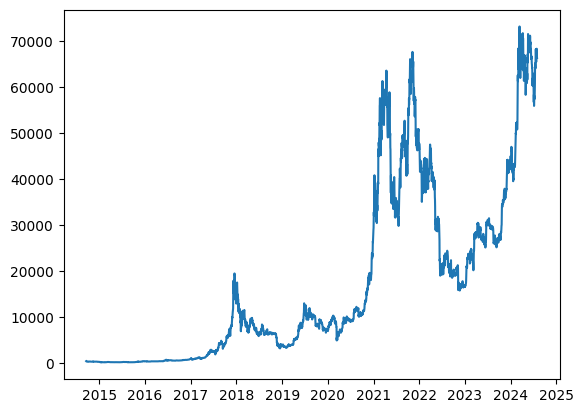

In [7]:
plt.plot(btc_reset['Date'],btc_reset['Close'])
plt.show()

In [8]:
btc_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
btc_reset['ds'] = btc_reset['ds'].dt.tz_localize(None)
btc_final=btc_reset[['ds','y']]
btc_final.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [9]:
btc_train = btc_reset.iloc[:len(btc_reset)-365]
btc_test = btc_reset.iloc[len(btc_reset)-365:]

In [10]:
model_p= Prophet()
# model_p.add_regressor('Volume')
model_p.fit(btc_train)

13:53:05 - cmdstanpy - INFO - Chain [1] start processing
13:53:11 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model_p.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = model_p.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-12.610132,-8478.714802,5031.954761,-12.610132,-12.610132,-1712.834696,-1712.834696,-1712.834696,15.831808,15.831808,15.831808,-1728.666504,-1728.666504,-1728.666504,0.0,0.0,0.0,-1725.444828
1,2014-09-18,-11.662837,-8237.884461,4414.498714,-11.662837,-11.662837,-1793.342884,-1793.342884,-1793.342884,-25.587977,-25.587977,-25.587977,-1767.754907,-1767.754907,-1767.754907,0.0,0.0,0.0,-1805.005720
2,2014-09-19,-10.715541,-8361.089469,4853.409048,-10.715541,-10.715541,-1810.646195,-1810.646195,-1810.646195,-8.347461,-8.347461,-8.347461,-1802.298733,-1802.298733,-1802.298733,0.0,0.0,0.0,-1821.361735
3,2014-09-20,-9.768245,-8701.746407,4678.737495,-9.768245,-9.768245,-1823.178599,-1823.178599,-1823.178599,8.731853,8.731853,8.731853,-1831.910452,-1831.910452,-1831.910452,0.0,0.0,0.0,-1832.946844
4,2014-09-21,-8.820949,-8503.982251,4769.748166,-8.820949,-8.820949,-1848.285282,-1848.285282,-1848.285282,7.938007,7.938007,7.938007,-1856.223289,-1856.223289,-1856.223289,0.0,0.0,0.0,-1857.106232


In [12]:
plot_plotly(model_p ,forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2023, 7, 29, 0, 0),
                          datetime.datetime(2023, 7, 30, 0, 0),
                          datetime.datetime(2023, 7, 31, 0, 0)], dtype=object),
              'y': array([  457.33401489,   424.44000244,   394.79598999, ..., 29356.91796875,
                          29275.30859375, 29230.11132812])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([ -8478.71480172,  -8237.88446133,  -8361.0894695 , ..., -11650.90176412,
                          -11157.04369042, -11530.6004881 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([-1725.4448282 , -1805.00572029, -1821.36173538, ...,  -500.51208311,
                           -542.84760484,  -627.61618679])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([ 5031.95476099,  4414.49871405,  4853.40904828, ..., 11741.42512178,
                          10719.31196465, 10725.6765401 ])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                            

In [13]:
plot_components_plotly(model_p, forecast)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([-12.61013227, -11.66283657, -10.71554088, ..., 369.8964042 ,
                          325.82545606, 281.75450793]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  -12.61013227,   -11.66283657,   -10.71554088, ..., 10016.72636303,
                          10002.24851247,  9987.77066191]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0),
                          datetime.datetime(2014, 9, 18, 0, 0),
                          datetime.datetime(2014, 9, 19, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  -12.61013227,   -11.66283657,   -10.71554088, ..., -8478.29233681,
                          -8553.43465264, -8628.57696848]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([228.94515713, 279.29779596, 320.39215454, ...,  34.54133575,
                          105.2241025 , 170.48941727]),
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0),
                          datetime.datetime(2017, 1, 4, 0, 0),
                          datetime.datetime(2017, 1, 5, 0, 0),
                          datetime.datetime(2017, 1, 6, 0, 0),
                          datetime.datetime(2017, 1, 7, 0, 0)], dtype=object),
              'xaxis': 'x3',
              'y': array([  7.93800656,  17.31211265, -15.8783423 ,  15.83180772, -25.58797673,
                  

In [14]:
from statsmodels.tools.eval_measures import rmse

In [15]:
predictions = forecast.iloc[-365:]['yhat']

In [16]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,btc_test['y']))
print("Mean Value of Test Dataset:", btc_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  44845.41873928551
Mean Value of Test Dataset: 48566.10661922089


In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(btc_test.y, predictions)
print("R-squared:", r2)

R-squared: -6.917526322887275
